In [86]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

In [87]:
auvRange = 20
shrimpRange = 100
#rate = shrimpRange/auvRange
timeNoiseRange = 0.0005
distNoiseRange = (1/100)*auvRange

auvPos = [[0,0],[0,0],[0,0],[0,0]]
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]

def createPositions(auvPos):
    for i in range(len(auvPos)):
        auvPos[i] = [rand.random()*auvRange, rand.random()*auvRange]
        rand1 = rand.random()*distNoiseRange 
        rand2 = rand.random()*distNoiseRange
        auvPosWN[i] = [(auvPos[i][0]+rand1),(auvPos[i][1]+rand2)]
    return auvPos,auvPosWN
auvPos,auvPosWN = createPositions(auvPos)

shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
#print(auvPos)
#print(auvPosWN)

In [88]:
diff = [[0,0],[0,0],[0,0],[0,0]]
def getDiffFromShrimp(shrimpPos, auvPos):
    for i in range(len(auvPos)):
        diff[i] = [shrimpPos[0] - auvPos[i][0],shrimpPos[1] - auvPos[i][1]];
        
    return diff

diff = getDiffFromShrimp(shrimpPos, auvPos)
#diff = getDiffFromShrimp(shrimpPos, auvPosWN)
#auvPos = auvPosWN

In [91]:
functions = []
soundSpeed = 1498
#gets deltas in seconds
def getMags():
    mag = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    k = 0
    for i in range(4):
        for j in range(i+1, 4):
           # print(i,j)
            mag[k] = (np.linalg.norm(diff[i])-np.linalg.norm(diff[j])) /1498
            #mag[k] = mag[k] + rand.random()*noiseRange;
            k = k+1
    return mag
#i want a for loop that prints 0,1 0,2 0,3 1,2,1,3 2,3 

timediff = getMags()

In [92]:
def loss(s):
    error = np.zeros(6)
    k = 0
    diff = getDiffFromShrimp(s, auvPos)
    for i in range(4):
        for j in range(i+1,4):
            #print(i,j)
            error[k] = timediff[k]-(np.linalg.norm(diff[i])-np.linalg.norm(diff[j]))/1498
            k = k+1
    return error

In [93]:
from scipy.optimize import least_squares
#shrimp location estimate
initial_estimates=shrimpPos
res = least_squares(loss, initial_estimates)
print(res.x)
print(shrimpPos)

[ 317.75614118  189.54325872]
[91.80399603850954, 50.82214128749148]


In [94]:
res.cost
#angle
print(np.arctan(res.x[1]/res.x[0]))
print(np.arctan(shrimpPos[1]/shrimpPos[0]))


0.537845990146
0.505598330945


In [95]:
#error = guess - real
NoiseOfDistance = np.arange(0, 1, 0.02)
print(len(errorOfDistance))

shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]

auvPos = createPositions(auvPos)
diff = getDiffFromShrimp(shrimpPos, auvPos)
auvPos,auvPosWN = createPositions(auvPos)


50


TypeError: unsupported operand type(s) for -: 'float' and 'list'

[ 66.687679    46.44983277]
[10.366567606137089, 36.02419624487448]


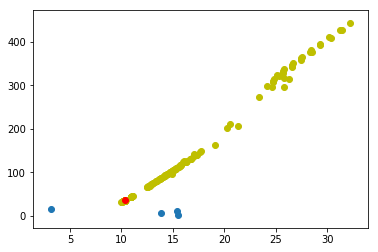

-39.0876484154 (56.321111393008415, 10.425636529463738)
[  15.66473953  114.12052179]
[10.366567606137089, 36.02419624487448]
True


In [266]:

results = []
initial_est = []

auvPos = [[0,0],[0,0],[0,0],[0,0]]
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]

auvPos,auvPosWN = createPositions(auvPos)
shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
diff = getDiffFromShrimp(shrimpPos, auvPos)
timediff = getMags()


for i in range(15):
    for j in range(15):
        #initial_estimates = [rand.random()*shrimpRange, rand.random()*shrimpRange];
        initial_estimates = [i * 5, j * 5];
        initial_est.append(initial_estimates)
        result = (least_squares(loss, initial_estimates))
        if(result.success == False):
            print("NO")
        plt.scatter(result.x[0], result.x[1], c='y')
        results.append(result.x)

x,y = zip(*auvPos)


angleguess = np.arctan(res.x[1]/res.x[0])
real = np.arctan(shrimpPos[1]/shrimpPos[0])
anglediff = (angleguess - real)*180/np.pi
posdiff = (res.x[0]-shrimpPos[0], res.x[1]-shrimpPos[1])

#plt.plot([0,res.x[0]], [0, res.x[1]], marker = 'o',c='b')
plt.scatter([shrimpPos[0]], [shrimpPos[1]], marker = 'o',c='r')

plt.scatter(x,y)
#plt.scatter(shrimpPos[0], shrimpPos[1])
#plt.scatter(res.x[0], res.x[1], c='g')
print(res.x)
print(shrimpPos)
plt.show()
print(anglediff, posdiff)

#print(results)
print(result.x)
print(shrimpPos)
print(result.success)

In [263]:
#According to the least squares algorithm, convergence always occurs, but result is inaccurate

auvPos = [[0,0],[0,0],[0,0],[0,0]]
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]

auvPos,auvPosWN = createPositions(auvPos)
shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
diff = getDiffFromShrimp(shrimpPos, auvPos)
timediff = getMags()